### Curso de Python para Finanças Quantitativas

#### Aula 4 - Candlesticks e sinais no Python
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

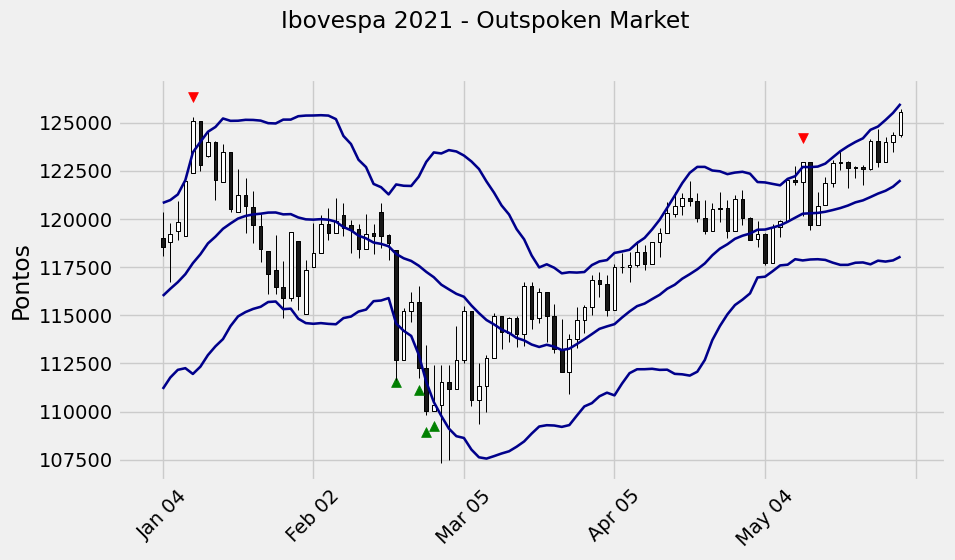

In [1]:
!pip install mplfinance

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB ? eta 0:00:00


In [2]:
# Carregando as bibliotecas necessarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplfinance as fplt
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

___________________________________________

In [5]:
# Muda o diretorio de trabalho
import os
os.chdir("D:\\Users\\Usuario\\Dropbox\\PAS FILES\\PHANTON\\Outspoken Market")

___________________________________________

### Candlestick

In [6]:
# Parametros da funçao

ticker = "^BVSP"
inicio = "2015-01-01"
fim = "2021-05-31"

In [7]:
ibov = pdr.get_data_yahoo(ticker, start = inicio, end = fim)

[*********************100%%**********************]  1 of 1 completed


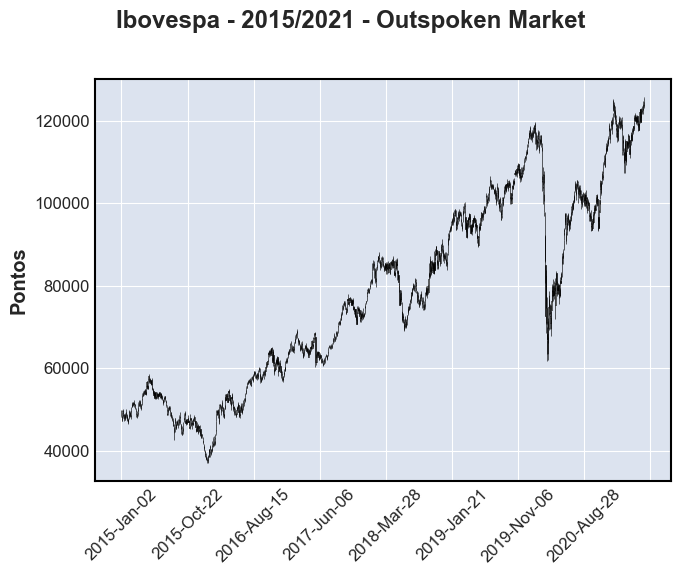

In [8]:
# Criando o seu gràfico

fplt.plot(
            ibov
            , type = "candle"
            , title = "Ibovespa - 2015/2021 - Outspoken Market"
            , ylabel = "Pontos"
        )

In [9]:
# Escolhendo apenas 2021

ibov2021 = ibov.loc["2021-01-1":"2021-12-31"]

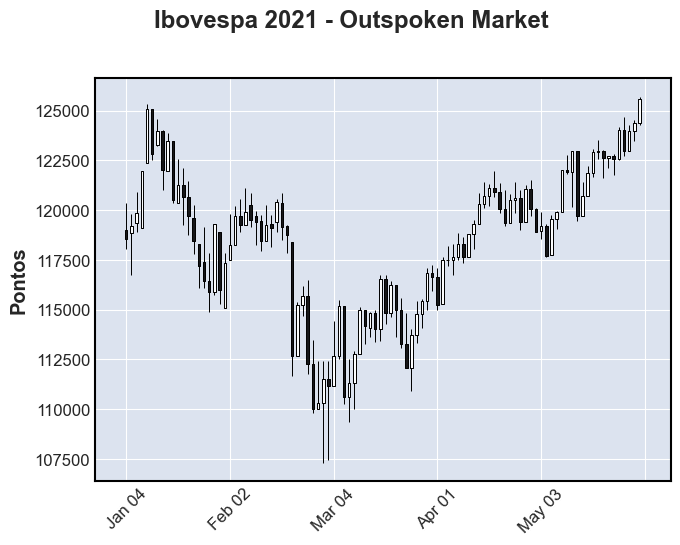

In [10]:
# Gràfico de 2021

fplt.plot(
            ibov2021
            , type = "candle"
            , title = "Ibovespa 2021 - Outspoken Market"
            , ylabel = "Pontos"
        )

In [8]:
# Verificando a lista de estilos disponiveis

fplt.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

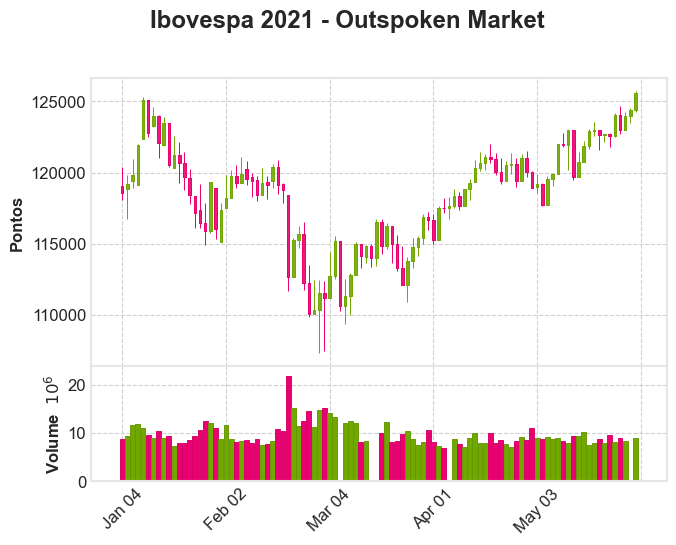

In [12]:
# Gràfico com novo estilo

fplt.plot(
    ibov2021
    , type = "candle"
    , title = "Ibovespa 2021 - Outspoken Market"
    , ylabel = "Pontos"
    , style = "binance"
    , volume = True
)

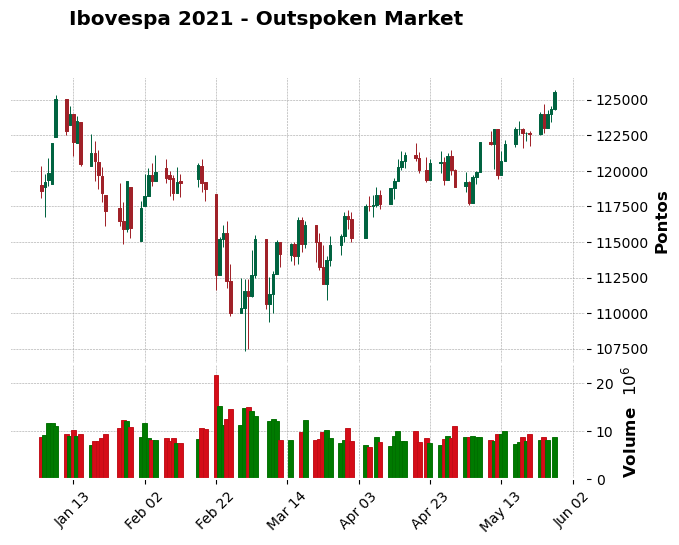

In [13]:
# Adicionando o volume e finais de semana

fplt.plot(
    ibov2021
    , type = "candle"
    , title = "Ibovespa 2021 - Outspoken Market"
    , ylabel = "Pontos"
    , style = "charles"
    , volume = True
    , show_nontrading = True
)

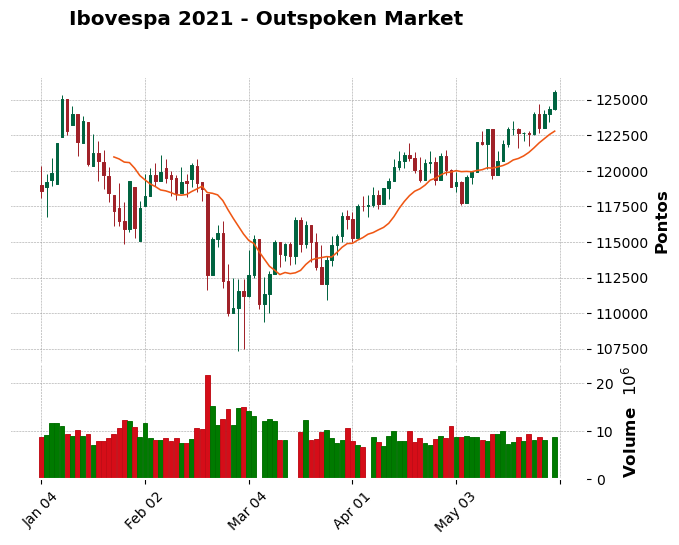

In [14]:
# Adicionando uma média mòvel

fplt.plot(
    ibov2021
    , type = "candle"
    , title = "Ibovespa 2021 - Outspoken Market"
    , ylabel = "Pontos"
    , style = "charles"
    , volume = True
    , mav = 15
)

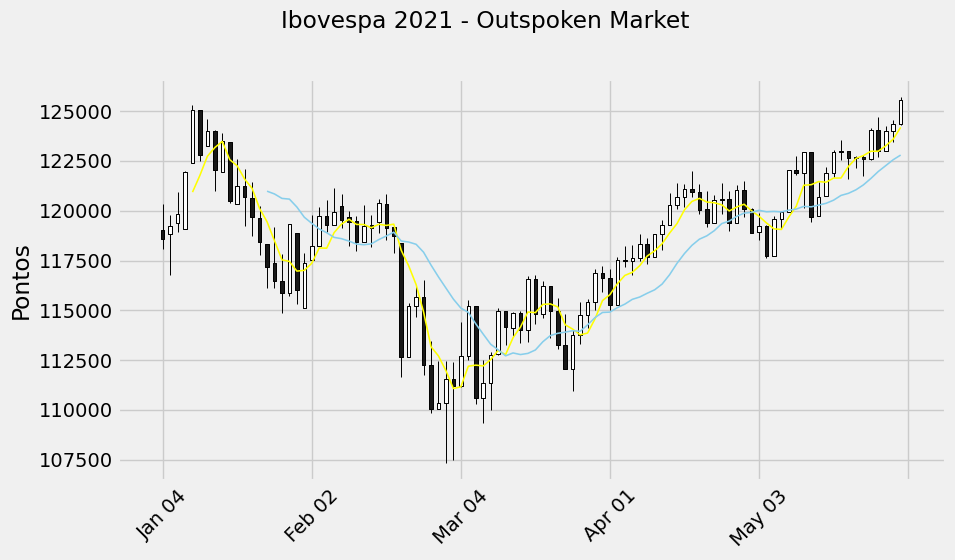

In [15]:
# Mudando o estilo geral

setup = fplt.make_mpf_style(mavcolors = ["yellow", "skyblue"]
                           , base_mpl_style = "fivethirtyeight")

fplt.plot(
    ibov2021
    , type = "candle"
    , title = "Ibovespa 2021 - Outspoken Market"
    , ylabel = "Pontos"
    , style = setup
    , mav = (5, 15)
    , figratio = (12,6)
)

___________________________________________

### Incluindo indicadores customizados e sinais

In [16]:
# Càlculo das BB

periodo = 20
desvios = 2
ibov["desvio"] = ibov["Adj Close"].rolling(periodo).std()
ibov["MM"] = ibov["Adj Close"].rolling(periodo).mean()
ibov["Banda_Sup"] = ibov["MM"] + (ibov["desvio"]*desvios)
ibov["Banda_Inf"] = ibov["MM"] - (ibov["desvio"]*desvios)

In [17]:
ibov2021 = ibov.loc["2021-01-1":"2021-12-31"]

In [18]:
# Criando o elemento das BB para adicional ao gràfico

bb = fplt.make_addplot(ibov2021[["MM", "Banda_Sup", "Banda_Inf"]])

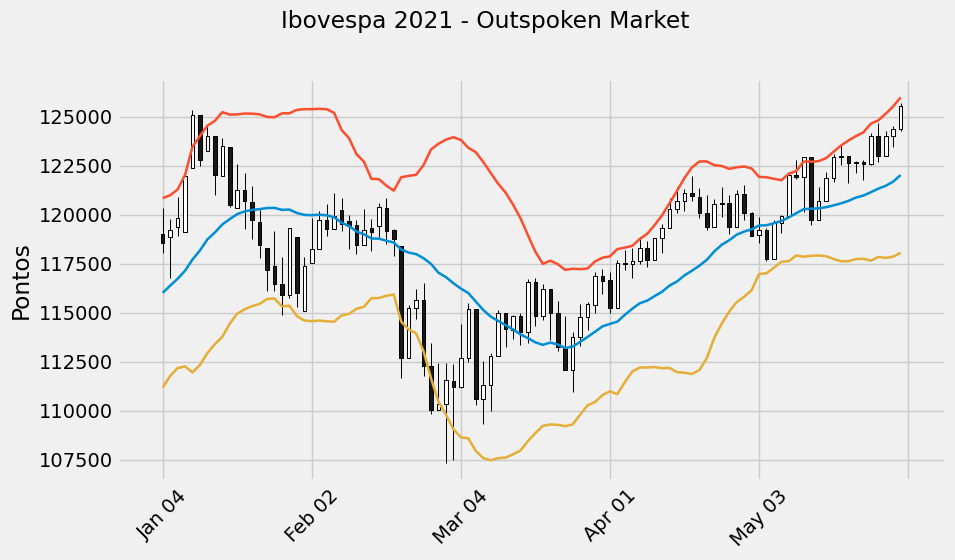

In [19]:
# Gràfico com BB

fplt.plot(
    ibov2021
    , type = "candle"
    , title = "Ibovespa 2021 - Outspoken Market"
    , ylabel = "Pontos"
    , style = setup
    , figratio = (12,6)
    , addplot = bb
)

In [20]:
# Gera o sinal

ibov2021.loc[: , "Sinal_Inf"] = np.where((ibov2021.loc[: , "Close"] < ibov2021.loc[: , "Banda_Inf"] )
                                         , ibov2021.loc[: , "Close"]*0.99
                                         , np.nan)
ibov2021.loc[: , "Sinal_Sup"] = np.where((ibov2021.loc[: , "Close"] > ibov2021.loc[: , "Banda_Sup"] )
                                         , ibov2021.loc[: , "Close"]*1.01
                                         , np.nan)

In [21]:
ibov2021.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Sinal_Inf,Sinal_Sup
Date,,,,,,,,,,,,
2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400,2416.051265,116008.15,120840.252529,111176.047471,NaN,NaN
2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100,2304.554676,116378.60,120987.709351,111769.490649,NaN,NaN
2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200,2277.978920,116725.20,121281.157839,112169.242161,NaN,NaN
2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800,2441.654096,117138.90,122022.208193,112255.591807,NaN,NaN
2021-01-08,122387.0,125324.0,122386.0,125077.0,125077.0,11085800,2878.050720,117711.50,123467.601440,111955.398560,NaN,126327.77


In [22]:
# Cria o vetor de indicadores

indicadores = [fplt.make_addplot(ibov2021["Sinal_Inf"], type = "scatter", markersize = 50, marker = "^", color = "green")
       , fplt.make_addplot(ibov2021["Sinal_Sup"], type = "scatter", markersize = 50, marker = "v", color = "red")
       , fplt.make_addplot(ibov2021[["MM", "Banda_Sup", "Banda_Inf"]], color = "darkblue")
      ]

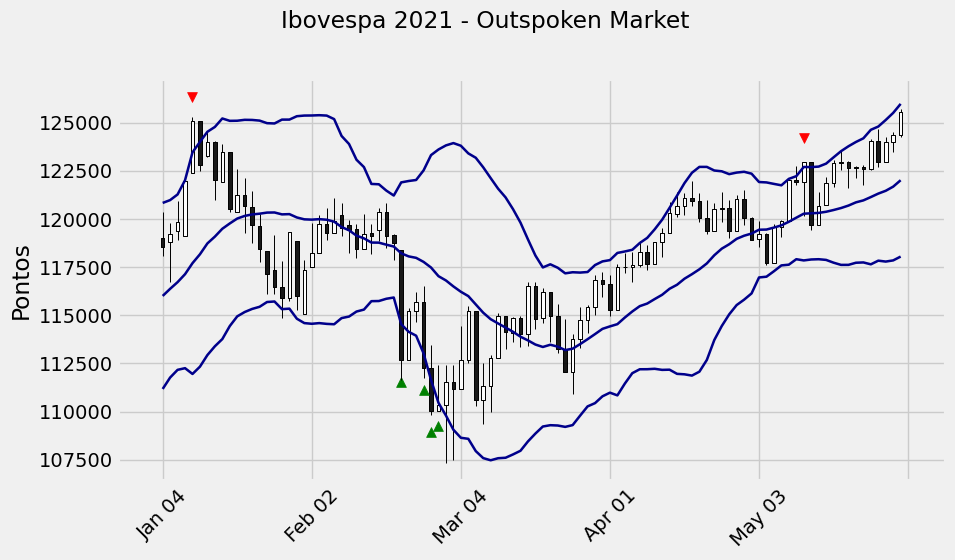

In [23]:
# Adicionando os indicadores ao gràfico

fplt.plot(
    ibov2021
    , type = "candle"
    , title = "Ibovespa 2021 - Outspoken Market"
    , ylabel = "Pontos"
    , style = setup
    , figratio = (12,6)
    , addplot = indicadores
)

In [25]:
# Salva o gràfico em png

fplt.plot(
    ibov2021
    , type = "candle"
    , title = "Ibovespa 2021 - Outspoken Market"
    , ylabel = "Pontos"
    , style = setup
    , figratio = (12,6)
    , addplot = indicadores
    , savefig = "ibov2021.png"
)